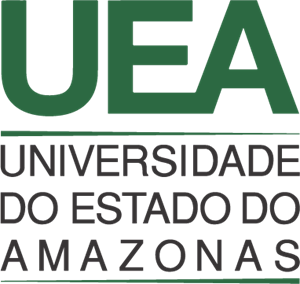

- Módulo: Machine Learning Aplicado I

- Equipe: [NAME]

- Alunos:
  
  - Andrew da Silva Santos
  - Eberth Felipe Castro da Cruz
  - Eduardo Amorim de Araújo




#Coding

##General Imports

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, DistanceMetric
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

Install Shap

In [2]:
!pip install shap

     |████████████████████████████████| 356 kB 7.5 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491646 sha256=8cf4c0ad1f0a4c98665f6a5bf0cc169a518a8ba1656266e71a8d6fa3c075bc9a
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


##Get data from Kaggle API
Reference: https://colab.research.google.com/github/corrieann/kaggle/blob/master/kaggle_api_in_colab.ipynb

###Install Kaggle

In [3]:
!pip install kaggle

###Get Files

In [4]:
# Kaggle API reference: https://github.com/Kaggle/kaggle-api
def import_kaggle_api_key():
  from google.colab import files

  uploaded = files.upload()

  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    
  # Then move kaggle.json into the folder where the API expects to find it.
  !mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

def get_data_from_competition():
  # Kaggle competition link
  # https://www.kaggle.com/c/aml-t2-fw/data
  !kaggle competitions download -c aml-t2-fw
  !ls -la ./
  !unzip ./Dados_Teste.csv.zip
  !unzip ./Dados_Treino.csv.zip
  !ls -la ./

Run this function to import your API.

In order to get you key, got to **Kaggle** > Account > Create New API Token

Import `kaggle.json` file

In [5]:
import_kaggle_api_key()

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 68 bytes


In [6]:
get_data_from_competition()

  0% 0.00/114k [00:00<?, ?B/s]
100% 114k/114k [00:00<00:00, 43.7MB/s]
  0% 0.00/28.2k [00:00<?, ?B/s]
100% 28.2k/28.2k [00:00<00:00, 24.2MB/s]
 25% 5.00M/20.3M [00:00<00:00, 26.6MB/s]
100% 20.3M/20.3M [00:00<00:00, 67.2MB/s]
  0% 0.00/2.30M [00:00<?, ?B/s]
100% 2.30M/2.30M [00:00<00:00, 76.3MB/s]
total 23268
drwxr-xr-x 1 root root     4096 Jul 20 02:11 .
drwxr-xr-x 1 root root     4096 Jul 20 02:05 ..
drwxr-xr-x 4 root root     4096 Jul 16 13:19 .config
-rw-r--r-- 1 root root  2410135 Jul 20 02:11 Dados_Teste.csv.zip
-rw-r--r-- 1 root root 21243109 Jul 20 02:11 Dados_Treino.csv.zip
-rw-r--r-- 1 root root    28910 Jul 20 02:11 Dicionario_de_Dados.csv
drwxr-xr-x 1 root root     4096 Jul 16 13:20 sample_data
-rw-r--r-- 1 root root   117176 Jul 20 02:11 Template_Submissao.csv
Archive:  ./Dados_Teste.csv.zip
  inflating: Dados_Teste.csv         
Archive:  ./Dados_Treino.csv.zip
  inflating: Dados_Treino.csv        
total 108712
drwxr-xr-x 1 root root     4096 Jul 20 02:11 .
drwxr-xr-x 1 roo

##Datasets


###Initial view

In [7]:
df_dados_teste = pd.read_csv('./Dados_Teste.csv')
df_dados_treino = pd.read_csv('./Dados_Treino.csv')
df_dict_dados = pd.read_csv('./Dicionario_de_Dados.csv')
df_template_sub = pd.read_csv('./Template_Submissao.csv')

In [8]:
def explore_dataset(df_aux):
  delimiter = '--------------------'
  print(df_aux.shape)
  print(delimiter)
  print(round(df_aux.describe(), 2))
  print(delimiter)
  df_aux.info(verbose=True)

Dados de Treino

In [9]:
df_dados_treino.head()

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,...,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1
1,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,108.0,203.01,0,0,NaN,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0,46.0,37.0,37.0,51.0,7.45,33.0,145.0,...,11.3,11.3,36.9,36.9,1.3,1.3,3.5,3.5,557.0,557.0,4.2,4.2,145.0,145.0,12.7,12.7,37.0,37.0,7.45,7.45,51.0,51.0,54.8,51.000000,37.0,37.0,7.45,7.45,51.0,51.0,51.0,51.0,0,0,0,0,0,0,0,1
2,262220,118,81.0,22.635548,1,Caucasian,F,165.1,Operating Room,Operating Room / Recovery,92,admit,CTICU,0.000694,0,61.7,NaN,203.0,1206.03,1,0,NaN,NaN,NaN,0.6,4.0,6.0,0.0,5.0,185.0,114.0,25.9,1,60.0,30.0,30.0,142.0,7.39,4.0,NaN,...,11.6,11.6,34.0,34.0,1.6,1.1,NaN,NaN,43.0,43.0,NaN,NaN,NaN,NaN,8.8,8.8,37.0,27.0,7.44,7.34,337.0,102.0,342.5,236.666667,36.0,33.0,7.37,7.34,337.0,265.0,337.0,337.0,0,0,0,0,0,0,0,0
3,201746,33,19.0,NaN,0,Caucasian,M,188.0,NaN,Accident & Emergency,91,admit,Med-Surg ICU,0.073611,0,NaN,NaN,119.0,601.01,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,0,103.0,NaN,NaN,NaN,NaN,16.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0
4,182697,83,67.0,27.555611,0,Caucasian,M,190.5,Direct Admit,Accident & Emergency,95,admit,Med-Surg ICU,0.000694,0,100.0,NaN,301.0,403.01,0,0,NaN,13.0,0.71,NaN,4.0,6.0,0.0,5.0,156.0,113.0,44.2,0,130.0,NaN,NaN,NaN,NaN,35.0,137.0,...,NaN,NaN,NaN,NaN,1.1,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1


In [24]:
explore_dataset(df_dados_treino)

(117141, 180)
--------------------
       encounter_id  ...  diabetes_mellitus
count     117141.00  ...          117141.00
mean      213013.98  ...               0.22
std        38128.78  ...               0.41
min       147001.00  ...               0.00
25%       179951.00  ...               0.00
50%       213051.00  ...               0.00
75%       246063.00  ...               0.00
max       279000.00  ...               1.00

[8 rows x 174 columns]
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117141 entries, 0 to 117140
Data columns (total 180 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   encounter_id                 int64  
 1   hospital_id                  int64  
 2   age                          float64
 3   bmi                          float64
 4   elective_surgery             int64  
 5   ethnicity                    object 
 6   gender                       object 
 7   height                       

Dados de Teste

In [28]:
df_dados_teste.head()

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_id,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,...,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,231640,42,35.0,29.060607,0,2,0,169.0,1044,0.161806,0,83.0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,91.0,120.0,NaN,0,68.0,NaN,NaN,NaN,NaN,39.0,NaN,34.7,1708.3872,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
1,220057,100,84.0,23.128938,0,2,0,170.2,490,0.040972,0,67.0,NaN,0,0,NaN,NaN,NaN,NaN,3.0,6.0,0.0,4.0,232.0,107.0,NaN,0,57.0,NaN,NaN,NaN,NaN,25.0,NaN,36.0,852.5952,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.16,1.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
2,238466,128,61.0,42.873376,0,2,1,175.2,335,0.143056,0,131.6,NaN,0,0,NaN,NaN,NaN,NaN,4.0,6.0,0.0,5.0,170.0,112.0,NaN,0,74.0,NaN,NaN,NaN,NaN,12.0,NaN,36.5,1611.8784,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
3,214794,77,86.0,25.795461,0,2,0,162.6,113,0.227778,0,68.2,NaN,0,0,NaN,19.0,0.90,NaN,3.0,6.0,0.0,5.0,110.0,96.0,23.7,0,65.0,NaN,NaN,NaN,NaN,45.0,138.0,36.4,NaN,0,6.5,NaN,NaN,...,NaN,7.5,7.5,26.1,26.1,1.10,1.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
4,255804,110,38.0,41.868512,1,0,0,170.0,973,2.173611,0,121.0,NaN,1,0,NaN,14.0,0.76,1.0,4.0,6.0,0.0,5.0,196.0,116.0,33.1,1,62.0,36.3,36.3,202.0,7.385,35.0,138.0,NaN,NaN,1,21.8,74.0,40.0,...,NaN,11.9,11.9,35.1,35.1,NaN,NaN,NaN,NaN,162.0,162.0,4.1,4.1,NaN,NaN,21.8,21.8,39.0,36.3,7.389,7.364,202.0,84.0,250.0,202.0,36.3,36.3,7.385,7.385,202.0,202.0,202.0,202.0,0,0,0,0,0,0,0


In [27]:
explore_dataset(df_dados_teste)

(13016, 173)
--------------------
       encounter_id  hospital_id  ...  lymphoma  solid_tumor_with_metastasis
count      13016.00     13016.00  ...  13016.00                     13016.00
mean      212882.75       105.04  ...      0.00                         0.02
std        37940.12        63.46  ...      0.06                         0.14
min       147000.00         1.00  ...      0.00                         0.00
25%       180537.25        47.00  ...      0.00                         0.00
50%       212676.50       110.00  ...      0.00                         0.00
75%       245433.25       163.00  ...      0.00                         0.00
max       278994.00       204.00  ...      1.00                         1.00

[8 rows x 173 columns]
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13016 entries, 0 to 13015
Data columns (total 173 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   encounter_id                 

###ETL

Pré-processamento de dados de treino e teste

In [9]:
#Transform fields from Object to int
def transform_fields(df, fields):
  label_encoder = LabelEncoder()
  for field in fields:
    df[field] = label_encoder.fit_transform(list(df[field].values))
  return df

#Treat numeric values from dataframe
def str_to_num(df_aux, index):
  for i in index:
    col_name = df_aux.columns[i]
    # df_aux[col_name] = df_aux[col_name].str.replace('.', '')
    # df_aux[col_name] = df_aux[col_name].str.replace(',', '.')
    df_aux[col_name] = pd.to_numeric(df_aux[col_name])
  return df_aux

In [10]:
fields_to_tranform = ['ethnicity', 'gender']
df_dados_teste = transform_fields(df_dados_teste, fields_to_tranform)
df_dados_treino = transform_fields(df_dados_treino, fields_to_tranform)

# Change field type
df_dados_teste = str_to_num(df_dados_teste, [3])
df_dados_treino = str_to_num(df_dados_treino, [3])

In [12]:
#Remove columns
rm_columns = ['hospital_admit_source', 'icu_admit_source', 
              'icu_stay_type', 'icu_type', 'apache_2_diagnosis', 
              'apache_3j_diagnosis' ]

df_dados_teste.drop(columns=rm_columns, inplace=True)
df_dados_treino.drop(columns=rm_columns, inplace=True)

In [29]:
#Replace NaN values with 0
df_dados_teste = df_dados_teste.fillna(0)
df_dados_treino = df_dados_treino.fillna(0)

In [30]:
#Check infinite values
print(np.all(np.isfinite(df_dados_teste)))
print(np.all(np.isfinite(df_dados_treino)))

print(np.any(np.isnan(df_dados_teste)))
print(np.any(np.isnan(df_dados_treino)))

True
True
False
False


##Machine Learning Algorithms

Algoritmos utilizados para prever a presença de Diabetes em pacientes

### Utility Functions to help the process

In [36]:
def get_samples_for_train_test(X, y, div_size, random):
  X_tr, X_ts, y_tr, y_ts = train_test_split(X, 
                                            y,
                                            stratify = y,
                                            test_size=div_size, 
                                            random_state=random)
  print('Amostras de treino:')
  print(f' * X_train: {X_tr.shape}')
  print(f' * y_train: {y_tr.shape}')

  print('Amostras de teste:')
  print(f' * X_test: {X_ts.shape}')
  print(f' * y_test: {y_ts.shape}')
  return X_tr, X_ts, y_tr, y_ts

def create_knn_model(neighbors, X_tr, X_ts, y_tr, y_ts):
  model = KNeighborsClassifier(n_neighbors=neighbors)
  model.fit(X_tr, y_tr)
  print(f'Acurácia (Treino): {round(accuracy_score(y_tr, model.predict(X_tr)), 2)}')
  print(f'Acurácia (Teste): {round(accuracy_score(y_ts, model.predict(X_ts)), 2)}')
  print(classification_report(y_test, knn_model.predict(X_test), target_names=['NO', 'YES']))
  return model


### KNN - k vizinhos mais próximos

In [32]:
# Get data for X and y
X = df_dados_treino.loc[:,'encounter_id':'solid_tumor_with_metastasis'].to_numpy()
y = df_dados_treino['diabetes_mellitus'].to_numpy()

In [27]:
print(X)

[[214826 118 68.0 ... 0 0 0]
 [246060 81 77.0 ... 0 0 0]
 [262220 118 81.0 ... 0 0 0]
 ...
 [219719 7 73.0 ... 0 0 0]
 [222562 170 81.0 ... 0 0 0]
 [157942 7 35.0 ... 0 0 0]]


In [33]:
X_train, X_test, y_train, y_test = get_samples_for_train_test(X, y, div_size=0.25, random=0)

Amostras de treino:
 * X_train: (87855, 173)
 * y_train: (87855,)
Amostras de teste:
 * X_test: (29286, 173)
 * y_test: (29286,)


Treino do Modelo utilizando a algoritmo KNN

In [43]:
knn_model = create_knn_model(neighbors=10, X_tr=X_train, X_ts=X_test, y_tr=y_train, y_ts=y_test)

Acurácia (Treino): 0.8
Acurácia (Teste): 0.79
              precision    recall  f1-score   support

          NO       0.79      0.98      0.88     22952
         YES       0.51      0.07      0.13      6334

    accuracy                           0.78     29286
   macro avg       0.65      0.53      0.50     29286
weighted avg       0.73      0.78      0.71     29286

